# <center><font color = 'red'>Customer Churn Prediction</font></center>
<center><img src = "https://media.giphy.com/media/HforLhFwFg1udVN327/giphy.gif"></center>

## Track
1. [Environment Setup](#set)
2. [Import Libraries](#import)
3. [Read Data](#read)
4. [Data Wrangling](#wrangling)
5. [Model Training Pre-Processing](#mlpp)
6. [Model Training](#actual)
7. [Model Evaluation](#final)<br>
[Errors Incountered](#Error)<br>
[Un Resolved Erros Incountered](#end)

## <font color = 'green'>Setup Environment<a class = 'anchor' id = 'set'></a><font>

In [ ]:
! pip install -r req.txt

## <font color = 'green'>Import Libraires<a class = 'anchor' id = 'import'></a></font>

In [127]:
# Common Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Butifying table contents
from tabulate import tabulate

# Complex Data Visualization
import seaborn as sns

# Data Splitng into train and test 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Data Standardization based on Z-score 
from sklearn.preprocessing import StandardScaler

# Model Traning
import tensorflow as tf

# Sequential -- Able to Forward and Backward Propagation
from tensorflow.keras.models import Sequential

# Dense -- Creating Nodes, Input_Layer, Hidden_Layers and the output
# Dropout -- For handling Overfitting
from tensorflow.keras.layers import Dense, ReLU, Dropout

## <font color = 'green'>Read Data<a class = 'anchor' id = 'read'></a></font>
<center><img src = "https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExbnJiZjhvd2p4N2gxbjNpazIycWhjcjNsb2NkNjllN3ZoNW41cmZobSZlcD12MV9naWZzX3NlYXJjaCZjdD1n/AS6bApfXcdnC9kUU6N/giphy.gif"></center>

In [40]:
data = pd.read_csv('Churn_Modelling.csv')

In [41]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### EDA

In [42]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [44]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [45]:
table = [["Column", "Unique Values", "Unique Elements"]]

for i in data:
    unique_elements = data[i].unique()
    if len(unique_elements) > 10:
        unique_elements = unique_elements[:25]
    table.append([i,data[i].nunique(),unique_elements])

print(tabulate(table, headers='firstrow', tablefmt='pretty'))

+-----------------+---------------+----------------------------------------------------------------------------+
|     Column      | Unique Values |                              Unique Elements                               |
+-----------------+---------------+----------------------------------------------------------------------------+
|    RowNumber    |     10000     |  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24  |
|                 |               |                                     25]                                    |
|   CustomerId    |     10000     |  [15634602 15647311 15619304 15701354 15737888 15574012 15592531 15656148  |
|                 |               |   15792365 15592389 15767821 15737173 15632264 15691483 15600882 15643966  |
|                 |               |   15737452 15788218 15661507 15568982 15577657 15597945 15699309 15725737  |
|                 |               |                                  15625047]                  

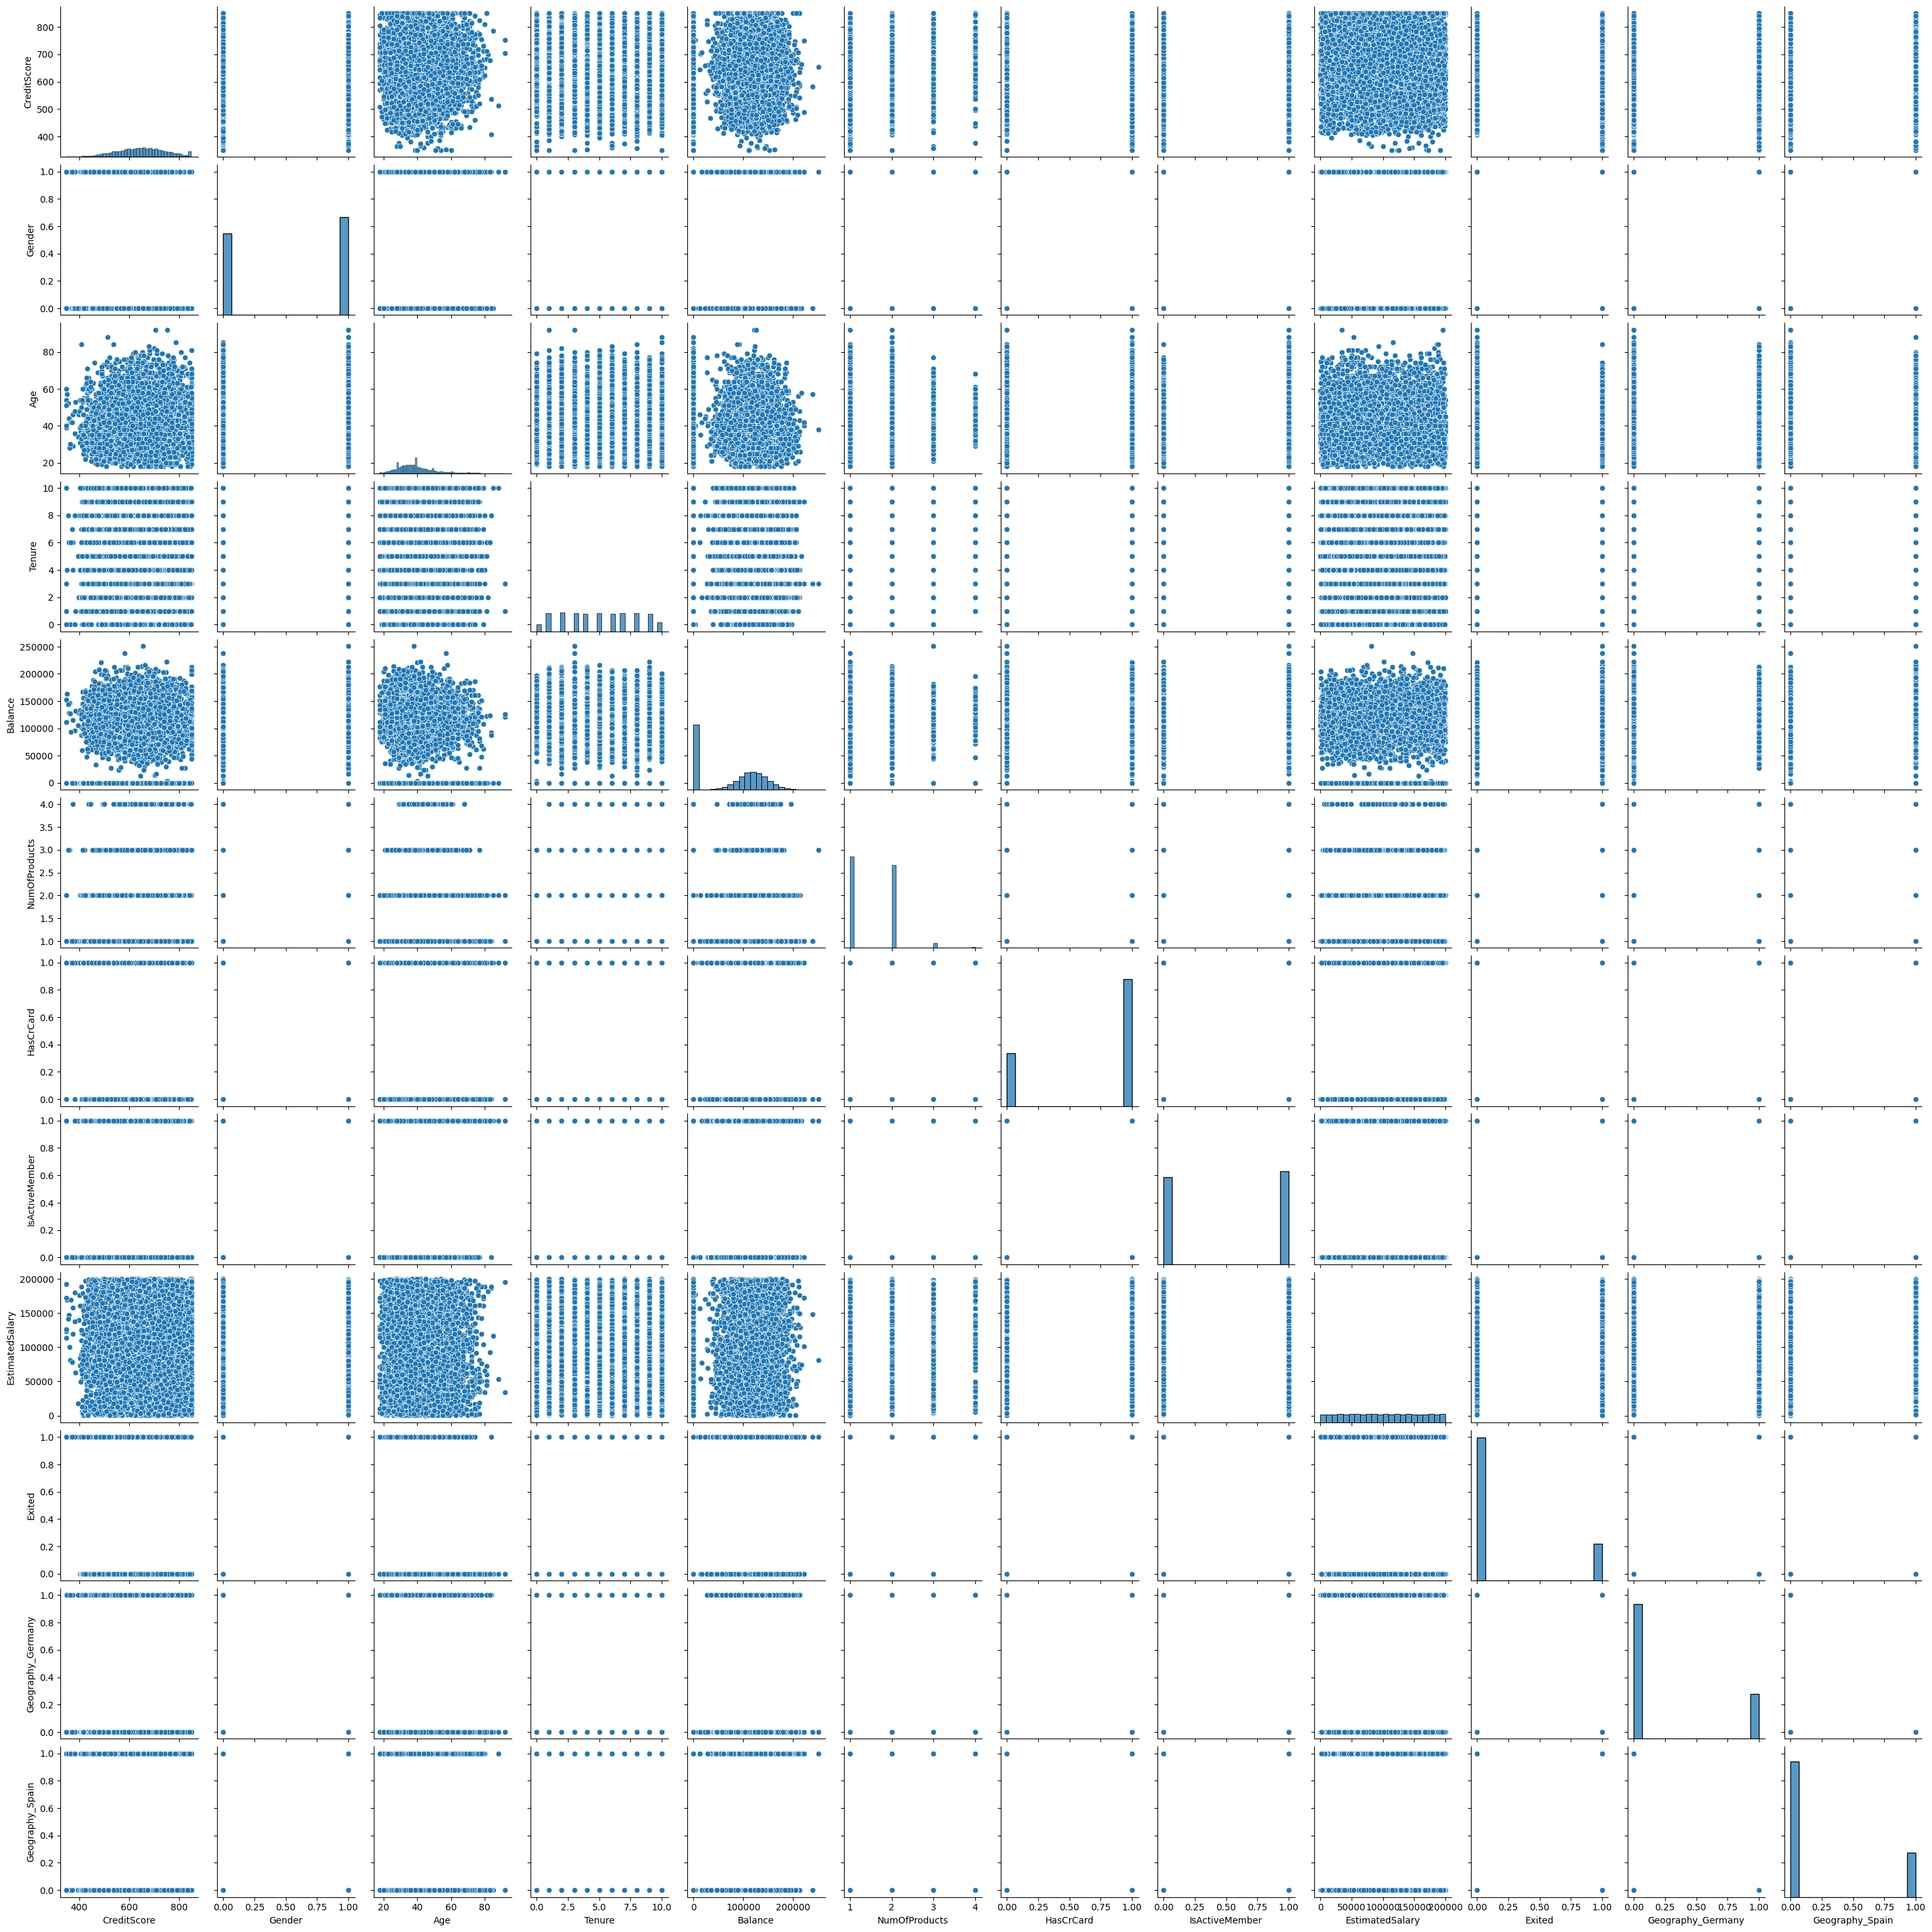

In [78]:
sns.pairplot(data)

## <font color='green'>Data Wrangling<a class='anchor' id='wrangling'></a></font>
<center><img src = "https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExNjZkbHJza3h2dXY0d2VxaHF3ZWNmMzNieW50dWRsaHNxOXQwMmRwaCZlcD12MV9naWZzX3NlYXJjaCZjdD1n/eIU2iObR3gkpcNpnPj/giphy.gif"></center>

#### Feature Engineering

In [ ]:
# Removing Unwanted data for model traning

for i in ['Surname','RowNumber','CustomerId']:
    data.drop(i, axis = 1,inplace = True)

In [47]:
data[data.duplicated()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


#### One-Hot Encoding

In [55]:
data = pd.get_dummies(data,columns = ['Geography'], drop_first = True)
data['Gender'].replace({'Female':0, 'Male':1}, inplace = True)

Loc = ["Geography_Germany","Geography_Spain"]
for i in Loc:
    data[i].replace({True:1,False:0}, inplace = True)

## <font color='green'>Model Training Pre-Processing<a class='anchor' id='mlpp'></a></font>

#### Dependent and Independent Variables

In [83]:
x = data.iloc[:,[i for i in range(data.shape[1]) if i != 9]]
y = data.iloc[:,9]

#### Spliting the Dataset

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7, random_state = 12)

In [85]:
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [86]:
print(f'x_train:{x_train.shape}, x_test:{x_test.shape}, y_train:{y_train.shape}, y_test:{y_test.shape}')

x_train:(7000, 11), x_test:(3000, 11), y_train:(7000,), y_test:(3000,)


## <font color='green'><a class='anchor' id='actual'>Model Training</a></font>
<center><img src = "https://media.giphy.com/media/skU5qA0NB7Y0o/giphy.gif"></center>

#### Deep Learning Layers Setup

In [131]:
model = Sequential()

model.add(Dense(units = 11))
model.add(Dense(units = 12,activation = 'ReLU'))
model.add(Dense(units = 1,activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['mse'])

#### Epoch Early Stopping

In [132]:
eraly_stoping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=4,
    verbose=0,
    mode="min",
    baseline=None,
    restore_best_weights=False,)

#### Check if GPU found

In [133]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## <font color='green'><a class='anchor' id='final'>Model Evaluation</font></a>

In [134]:
output_model = model.fit(x_train,y_train, validation_split = .3, epochs = 1000, callbacks=eraly_stoping, batch_size = 50)

Epoch 1/1000
98/98 [==============================] - 1s 5ms/step - loss: 0.4963 - mse: 0.1603 - val_loss: 0.4554 - val_mse: 0.1446
Epoch 2/1000
98/98 [==============================] - 0s 3ms/step - loss: 0.4442 - mse: 0.1406 - val_loss: 0.4335 - val_mse: 0.1375
Epoch 3/1000
98/98 [==============================] - 0s 2ms/step - loss: 0.4298 - mse: 0.1358 - val_loss: 0.4274 - val_mse: 0.1356
Epoch 4/1000
98/98 [==============================] - 0s 2ms/step - loss: 0.4245 - mse: 0.1339 - val_loss: 0.4240 - val_mse: 0.1343
Epoch 5/1000
98/98 [==============================] - 0s 3ms/step - loss: 0.4208 - mse: 0.1323 - val_loss: 0.4219 - val_mse: 0.1334
Epoch 6/1000
98/98 [==============================] - 0s 2ms/step - loss: 0.4185 - mse: 0.1313 - val_loss: 0.4207 - val_mse: 0.1328
Epoch 7/1000
98/98 [==============================] - 0s 2ms/step - loss: 0.4162 - mse: 0.1303 - val_loss: 0.4189 - val_mse: 0.1320
Epoch 8/1000
98/98 [==============================] - 0s 3ms/step - loss: 0.

In [135]:
output_model.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

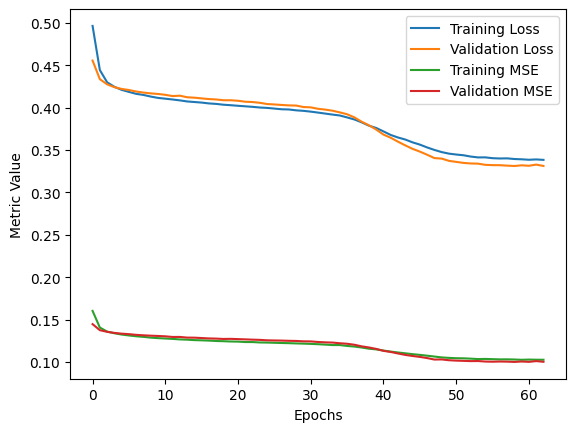

In [136]:
sns.lineplot(data=output_model.history['loss'], label='Training Loss')
sns.lineplot(data=output_model.history['val_loss'], label='Validation Loss')

# Plot training and validation MSE values
sns.lineplot(data=output_model.history['mse'], label='Training MSE')
sns.lineplot(data=output_model.history['val_mse'], label='Validation MSE')

# Label the axes
plt.xlabel('Epochs')
plt.ylabel('Metric Value')

# Add a legend
plt.legend()

# Show the plot
plt.show()

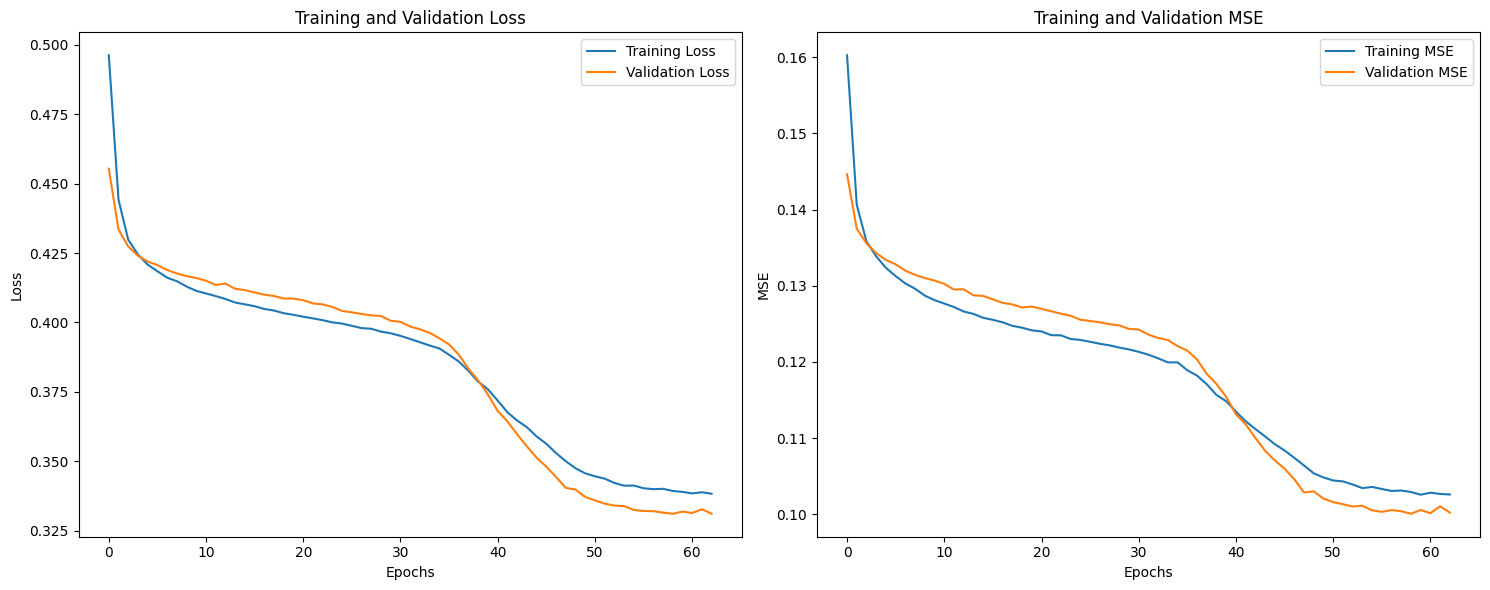

In [137]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.lineplot(data=output_model.history['loss'], label='Training Loss')
sns.lineplot(data=output_model.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1,2,2)
# Plot training and validation MSE values
sns.lineplot(data=output_model.history['mse'], label='Training MSE')
sns.lineplot(data=output_model.history['val_mse'], label='Validation MSE')

plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Training and Validation MSE')
plt.legend()

plt.tight_layout()
# Show the plot
plt.show()

In [138]:
y_pred = model.predict(x_test)
y_pred = (y_pred >= 0.5).astype(int) 

94/94 [==============================] - 0s 892us/step


In [130]:
print("y_test shape:", y_test.shape)
print("y_test type:", type(y_test))
print("y_pred shape:", y_pred.shape)
print("y_pred type:", type(y_pred))

y_test shape: (3000,)
y_test type: <class 'pandas.core.series.Series'>
y_pred shape: (3000, 12)
y_pred type: <class 'numpy.ndarray'>


In [139]:
confusion_matrix(y_test,y_pred)

array([[2278,   76],
       [ 352,  294]], dtype=int64)

In [140]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8573333333333333

# <center><font color = 'orange'>Errors Incountered</font></center><a class = 'anchor' id = 'Error'></a>
<center><img src = "https://media.giphy.com/media/QVPGt9wMckd5jXTgcj/giphy.gif"></center>

<b>pip install tensorflow-gpu==2.10.0</b><br>
<font color = 'blue'><b>Unable to access folder<b></font>  
<font color = 'green'>Go to the provided location Right Click, Properties, Security, chnage to all or change for admin and open the editor as amin.</font>

<b>Import tensorflow</b><br>
<font color = 'blue'><b>Type Error<b></font> --> handle()<br>
<font color = 'green'>Numpy version is not compateble with tensorflow, update to 1.21.3 <a href = 'https://github.com/tensorflow/tensorflow/issues/57966'>more</a></font>

## <center><font color = 'violet'>Un Resolved/Auto Resolved Erros Incountered<a class = 'anchor' id = 'end'> </font></center></a>

<b>tabulate function</b><br>
<font  color = 'blue'><b>ValueError</b></font><br> 
<font color='green'>The truth value of an array with more than one element is ambiguous. Use a.any() or a.all().</font>